In [1]:
import pandas as pd
import re
from tqdm import tqdm

import matplotlib.pyplot as plt
import numpy as np
import locationtagger



import nltk
import spacy
 
# essential entity models downloads
nltk.downloader.download('maxent_ne_chunker')
nltk.downloader.download('words')
nltk.downloader.download('treebank')
nltk.downloader.download('maxent_treebank_pos_tagger')
nltk.downloader.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/gopalsingh/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/gopalsingh/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     /Users/gopalsingh/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /Users/gopalsingh/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gopalsingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/gopalsingh/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
 
# initializing sample text
 
# extracting entities.

text = "Shop No 1 Kaveri Apartments Ramghat Rd opposite Meenakshi Cinema Sudhama Puri Aligarh Uttar Pradesh 202001"

place_entity = locationtagger.find_locations(text=text)
# getting all countries
print("The countries in text : ")
print(place_entity.countries)
 
# getting all states
print("The states in text : ")
print(place_entity.regions)
 
# getting all cities
print("The cities in text : ")
print(place_entity.cities)

The countries in text : 
[]
The states in text : 
[]
The cities in text : 
[]


In [3]:
df = pd.read_csv("google_review_29_08_v3.csv")
df.head()

,SVAAS_ID,user_id,firstName,middleName,lastName,email,phone,description,pan,mci,...,numberFollowUp,followUpDuration,insuranceProviderId,isActive,ABDM_Healthcare_Professional_ID,SVAAS_DOCTOR_ID,svaasClinicId,tbl_user_phone_number,name,location
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df[['firstName', 'middleName', 'lastName', 'name', 'baseCity']]
df.head()

,firstName,middleName,lastName,name,baseCity
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isna().sum()

firstName       20
middleName    1532
lastName        18
name            19
baseCity        19
dtype: int64

In [6]:
df.describe()

,firstName,middleName,lastName,name,baseCity
count,1716,204,1718,1717,1717
unique,1228,68,1074,1583,15
top,Rahul,,K,SLG HOSPITALS,Hyderabad
freq,14,78,31,23,524


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   firstName   1716 non-null   object
 1   middleName  204 non-null    object
 2   lastName    1718 non-null   object
 3   name        1717 non-null   object
 4   baseCity    1717 non-null   object
dtypes: object(5)
memory usage: 67.9+ KB


### Let's calculate the % of missing values

In [8]:
(df.isna().sum())/len(df) * 100

firstName      1.152074
middleName    88.248848
lastName       1.036866
name           1.094470
baseCity       1.094470
dtype: float64

It's apparent that middleName columns has the most number of missing values here. 

<AxesSubplot:>

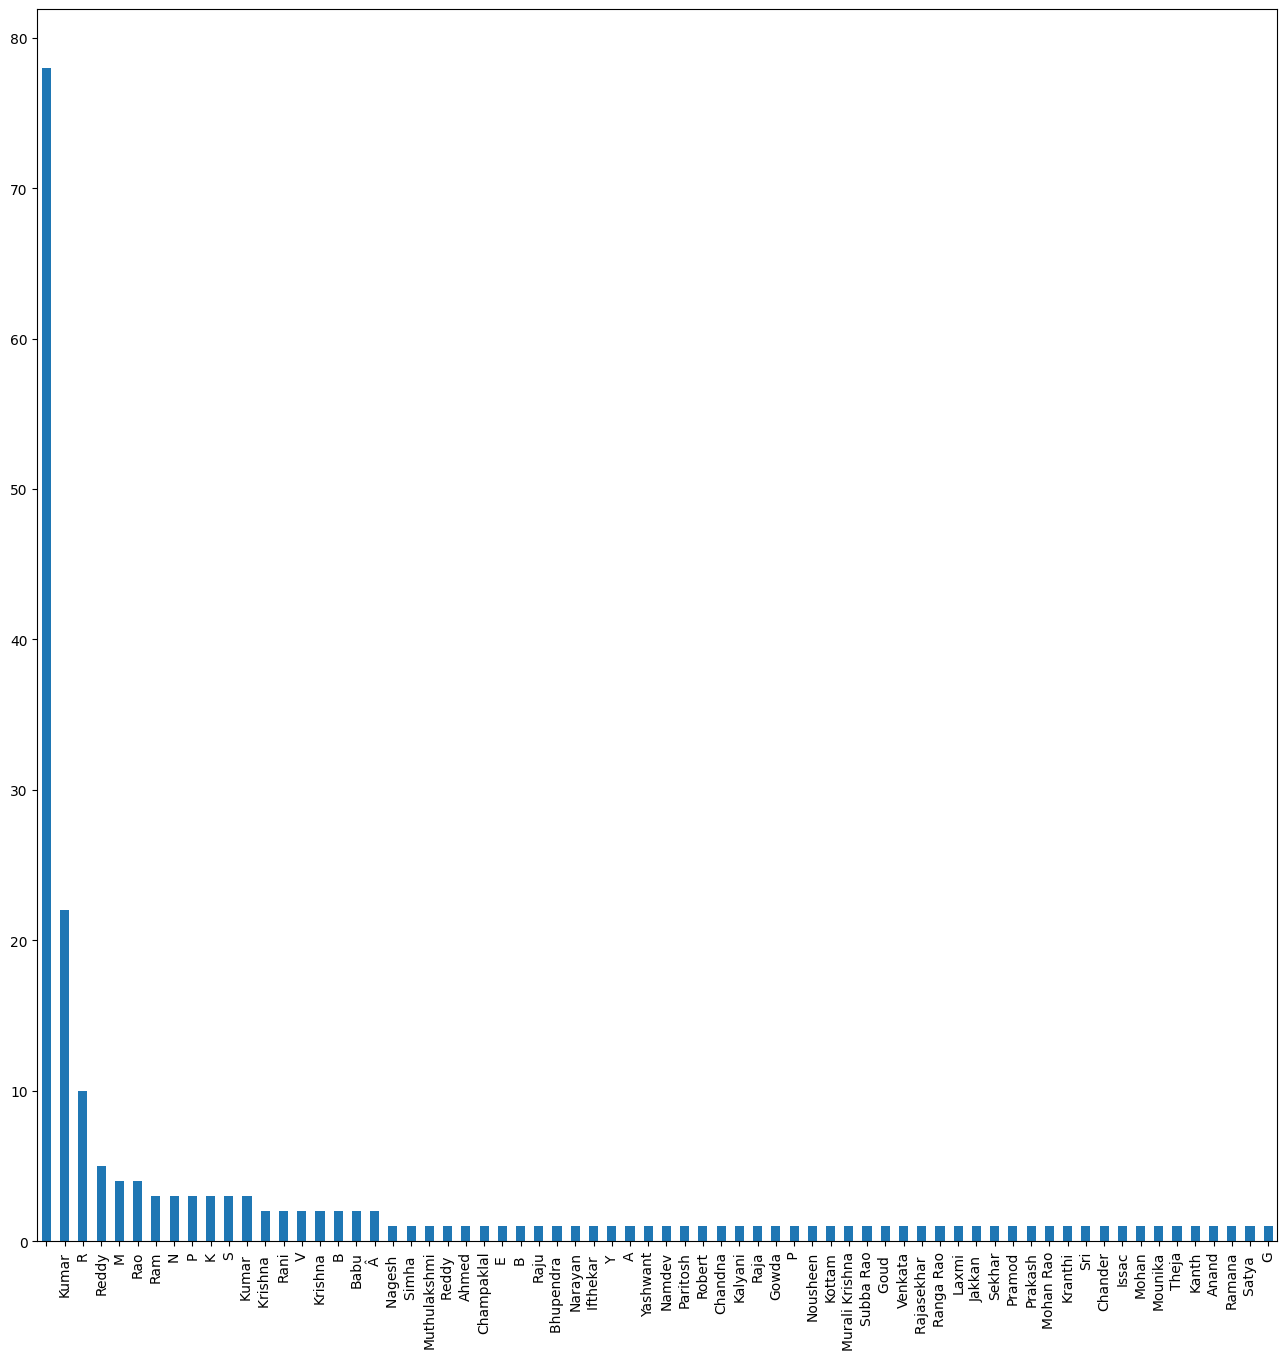

In [9]:
plt.figure(figsize=(16, 16))
df['middleName'].value_counts().plot.bar()

Kumar is the most common middle name we can observe here.

In [10]:
df[df['firstName'].isna() == False]

,firstName,middleName,lastName,name,baseCity
17,Divya,NaN,Kavuri,Apollo Clinic,Hyderabad
18,Shivam,NaN,P,Shivam hospitals,Hyderabad
19,Ranjan,NaN,Dey,Ranjan skin clinics,Hyderabad
20,Soumya,NaN,Sarkar,Soumya Multi speciality clinic,Hyderabad
21,Rishanku,NaN,Goyal,RKG Eye Center,Hyderabad
...,...,...,...,...,...
1731,Kushang,NaN,Mod,Shivam Children Hospital And Neonatal Care Centre,Ahmedabad
1732,Dhaval,NaN,Akhani,Childhood Hospital,Ahmedabad
1733,Keval Patel,NaN,Patel,Jk Dental Hospital Orthodontic & Implant Center,Ahmedabad
1734,Jinal Patel,NaN,Patel,Jk Dental Hospital Orthodontic & Implant Center,Ahmedabad


### I think, it will be safe to drop the middleName column, and we can proceed with the firstName only here.

In [11]:
df.drop('middleName', axis=1, inplace=True)

## Let's seggregate the data based on missing vs non-missing row values

In [12]:
df_not_missing = df.dropna()

In [13]:
df_not_missing.head()

,firstName,lastName,name,baseCity
17,Divya,Kavuri,Apollo Clinic,Hyderabad
18,Shivam,P,Shivam hospitals,Hyderabad
19,Ranjan,Dey,Ranjan skin clinics,Hyderabad
20,Soumya,Sarkar,Soumya Multi speciality clinic,Hyderabad
21,Rishanku,Goyal,RKG Eye Center,Hyderabad


In [14]:
df_not_missing.isna().sum()

firstName    0
lastName     0
name         0
baseCity     0
dtype: int64

In [15]:
df_not_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1715 entries, 17 to 1735
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   firstName  1715 non-null   object
 1   lastName   1715 non-null   object
 2   name       1715 non-null   object
 3   baseCity   1715 non-null   object
dtypes: object(4)
memory usage: 67.0+ KB


In [16]:
print(len(df_not_missing))

1715


In [17]:
len(df_not_missing)/len(df)

0.9879032258064516

In [18]:
df_not_missing['query'] = df_not_missing['firstName'].apply(lambda x:x.lower()) +"+" + df_not_missing['lastName'].apply(lambda x:x.lower()) \
                          +"+"+ df_not_missing['name'].apply(lambda x:x.lower()) + "+" + df_not_missing["baseCity"].apply(lambda x:x.lower())

/var/folders/z1/0tn2v83n6pzgl2m8lzz1phbc0000gn/T/ipykernel_51989/4047833984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_missing['query'] = df_not_missing['firstName'].apply(lambda x:x.lower()) +"+" + df_not_missing['lastName'].apply(lambda x:x.lower()) \


In [19]:
df_not_missing['query']

17                   divya+kavuri+apollo clinic+hyderabad
18                    shivam+p+shivam hospitals+hyderabad
19               ranjan+dey+ranjan skin clinics+hyderabad
20      soumya+sarkar+soumya multi speciality clinic+h...
21                rishanku+goyal+rkg eye center+hyderabad
                              ...                        
1731    kushang+mod+shivam children hospital and neona...
1732           dhaval+akhani+childhood hospital+ahmedabad
1733    keval patel+patel+jk dental hospital orthodont...
1734    jinal patel+patel+jk dental hospital orthodont...
1735                   lavanya+yasam+sai clinic+hyderabad
Name: query, Length: 1715, dtype: object

## For missing data

In [20]:
import preprocess_kgptalkie as ps
import re

def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x




In [21]:
df_not_missing['query'] = df_not_missing['query'].apply(lambda x:ps.remove_accented_chars(x))
df_not_missing['query'].head()

/var/folders/z1/0tn2v83n6pzgl2m8lzz1phbc0000gn/T/ipykernel_51989/153722280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_missing['query'] = df_not_missing['query'].apply(lambda x:ps.remove_accented_chars(x))


17                 divya+kavuri+apollo clinic+hyderabad
18                  shivam+p+shivam hospitals+hyderabad
19             ranjan+dey+ranjan skin clinics+hyderabad
20    soumya+sarkar+soumya multi speciality clinic+h...
21              rishanku+goyal+rkg eye center+hyderabad
Name: query, dtype: object

In [22]:
len(df_not_missing['query'].values)

1715

In [23]:
from collections import defaultdict

final_df = defaultdict(list)

In [24]:
df_not_missing = df_not_missing[['firstName', 'lastName', 'name', 'baseCity','query']]

In [25]:
# df_ch = df_not_missing[df_not_missing['baseCity'] == 'Chennai']
# df_ch.isna().sum()

In [26]:
def isDigit(char):
    pattern = "^[-+]?[0-9]*\.?[0-9]+(e[-+]?[0-9]+)?$"
    reg = re.compile(pattern)
    if reg.match(char):
        return True
    return False

In [39]:
from bs4 import BeautifulSoup
import urllib.request
import numpy as np

def extractReviews(df_not_missing):
    queries = df_not_missing['query'].values

    for i in tqdm(range(len(queries))):
        query = queries[i]
        query = "+".join(query.split(" "))
        url = 'https://google.com/search?q='+query
        print(url)

        request = urllib.request.Request(url)
        request.add_header('User-Agent', 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36')
        raw_response = urllib.request.urlopen(request).read()

        # Read the repsonse as a utf-8 string
        html = raw_response.decode("utf-8")

        soup = BeautifulSoup(html, 'html.parser')

        divs = soup.find_all("span", class_="Aq14fc")
        spans = soup.find_all("span", class_="hqzQac")
        practo_divs = soup.find_all("div", class_="fG8Fp uo4vr")

        if len(divs) > 0:
            for div, span, practo in zip(divs, spans, practo_divs):
                # Search for a h3 tag
                rating = div.get_text()
                greviews = span.get_text()
                prac = practo.get_text()
                print(greviews)
                greviews = [ps.remove_special_chars(i) for i in greviews.split(" ")]
                greviews = [i for i in greviews if isDigit(i)][0]
    #             print("Rating: ", rating, "Number of Reviews: ", greviews)
                final_df['firstName'].append(df_not_missing.iloc[i]['firstName'])
                final_df['lastName'].append(df_not_missing.iloc[i]['lastName'])
                final_df['clinicName'].append(df_not_missing.iloc[i]['name'])
                final_df['baseCity'].append(df_not_missing.iloc[i]['baseCity'])
    #             print(df_not_missing.iloc[i]['baseCity'])
                final_df['GoogleNRs'].append(float(greviews)
                final_df['practColumn'].append(prac)

                if rating is None:
                    print("Appending None!")
                    final_df['rating'].append("NA")
                else:
                    address = soup.find_all("span", class_="LrzXr")
    #                 print(df_not_missing.iloc[i]['baseCity'] in address[0].get_text())
    #                 print(address[0].get_text())
                    text = address[0].get_text()
                    text = ps.remove_accented_chars(text)
                    text = ps.remove_special_chars(text)
                    text = ps.remove_html_tags(text)

                    text = text.split(" ")
                    print(text)
                    print(text[-4:][:-1])
                    city = " ".join(text[-4:][:-1])

                    print("city: ", city)


                    final_df['extractedCity'].append(city)
                    if city == df_not_missing.iloc[i]['baseCity']:
                        print("Cities are matched!")
                        final_df['matched'].append(True)
                    else:
                        final_df['matched'].append(False)
                    final_df['rating'].append(rating)
                    
    return final_df

    #             print(div.get_text())


SyntaxError: invalid syntax (1046385845.py, line 51)

In [28]:
final_df = extractReviews(df_not_missing)

NameError: name 'extractReviews' is not defined

In [ ]:
pd.DataFrame(final_df).to_csv("output_v3_ch.csv", index=False)

In [ ]:
df_final = pd.DataFrame(final_df)

In [46]:
df_final

,firstName,lastName,clinicName,baseCity,GoogleNRs,extractedCity,matched,rating
0,Ranjan,Dey,Ranjan skin clinics,Hyderabad,176.0,Aligarh Uttar Pradesh,False,3.9
1,Soumya,Sarkar,Soumya Multi speciality clinic,Hyderabad,195.0,Karkhana Secunderabad Telangana,False,3.9
2,Rishanku,Goyal,RKG Eye Center,Hyderabad,175.0,New Delhi Delhi,False,4.2
3,Ranjan,Dey,Ranjan skin clinics,Hyderabad,176.0,Aligarh Uttar Pradesh,False,3.9
4,Soumya,Sarkar,Soumya Multi speciality clinic,Hyderabad,195.0,Karkhana Secunderabad Telangana,False,3.9


In [ ]:
df.columns

In [ ]:
pd.merge(df, df_final, how='outer').to_csv("full_output_30_aug_2022.csv", index=False)

In [28]:
pd.read_csv("full_output_30_aug_2022.csv")

,firstName,lastName,name,baseCity,clinicName,GoogleNRs,rating
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1747,Kushang,Mod,Shivam Children Hospital And Neonatal Care Centre,Ahmedabad,Shivam Children Hospital And Neonatal Care Centre,18.0,2.9
1748,Dhaval,Akhani,Childhood Hospital,Ahmedabad,Childhood Hospital,436.0,4.9
1749,Keval Patel,Patel,Jk Dental Hospital Orthodontic & Implant Center,Ahmedabad,Jk Dental Hospital Orthodontic & Implant Center,12.0,5.0
1750,Jinal Patel,Patel,Jk Dental Hospital Orthodontic & Implant Center,Ahmedabad,Jk Dental Hospital Orthodontic & Implant Center,3.0,4.0


In [ ]:
df

### Processing for NA

In [29]:
df = pd.read_csv("full_output_30_aug_2022.csv")
df.head()

,firstName,lastName,name,baseCity,clinicName,GoogleNRs,rating
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df_na = df[df['rating'].isna() == True]

In [36]:
df_na = df_na[df_na['firstName'].isna()!=True].drop('clinicName', axis=1)

In [39]:
df_na.columns = ['firstName', 'lastName', 'name', 'baseCity', 'GoogleNRs', 'googleRating']

In [40]:
df_na

,firstName,lastName,name,baseCity,GoogleNRs,googleRating
18,Divya,Kavuri,Apollo Clinic,Hyderabad,NaN,NaN
19,Shivam,P,Shivam hospitals,Hyderabad,NaN,NaN
23,Mamatha,R,Mamatha Clinics,Hyderabad,NaN,NaN
25,B,Ramesh,Aditya Medical Complex,Visakhapatnam,NaN,NaN
30,Sreeniavsa Rao,Reddy,Sri Srinivasa Gastro & Liver Centre,Visakhapatnam,NaN,NaN
...,...,...,...,...,...,...
1727,Dhirena,Sanandiya,Vaibhav Clinic,Ahmedabad,NaN,NaN
1728,Rakesh,Sanol,Sadbhavna Hospital,Ahmedabad,NaN,NaN
1735,Lal,Daga,Dr LalS Heart Centre,Ahmedabad,NaN,NaN
1744,Narayan,Varma,Pakhi Hospital,Ahmedabad,NaN,NaN
